<a href="https://colab.research.google.com/github/AbhinavRobinson/I_Learn_TensorFlow/blob/master/learn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# THIS IS BASED OFF THE TENSORFLOW , BASICS OF CLASSIFICATION AND NEURAL NETWORKS 

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

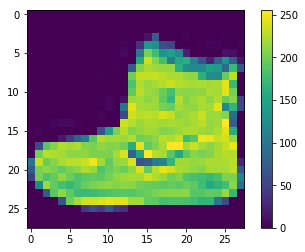

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

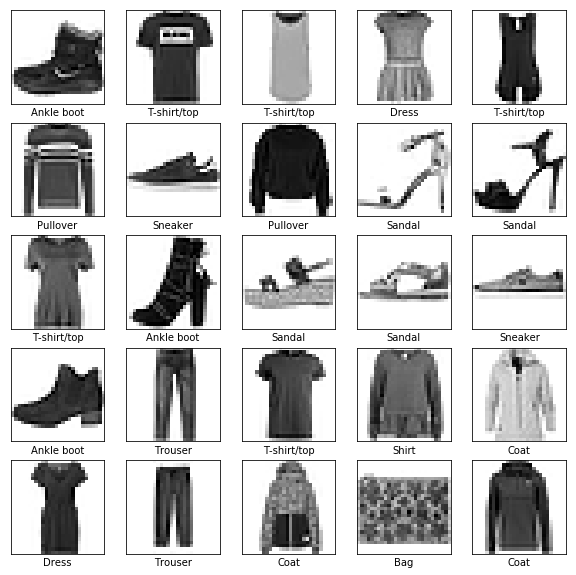

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
]) 

In [0]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5009 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3787 - acc: 0.8629
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3386 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3143 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2948 - acc: 0.8900


In [19]:
test_loss, test_acc = model.evaluate(test_images , test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3533 - acc: 0.8751
Test accuracy:  0.8751


In [0]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([8.8444108e-07, 8.4755536e-09, 4.5563806e-06, 1.0260004e-07,
       2.5201919e-06, 3.6201910e-03, 8.8371092e-07, 4.8890714e-02,
       2.2947823e-05, 9.4745719e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

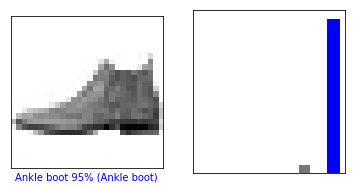

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

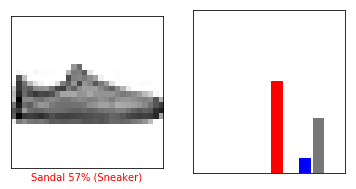

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

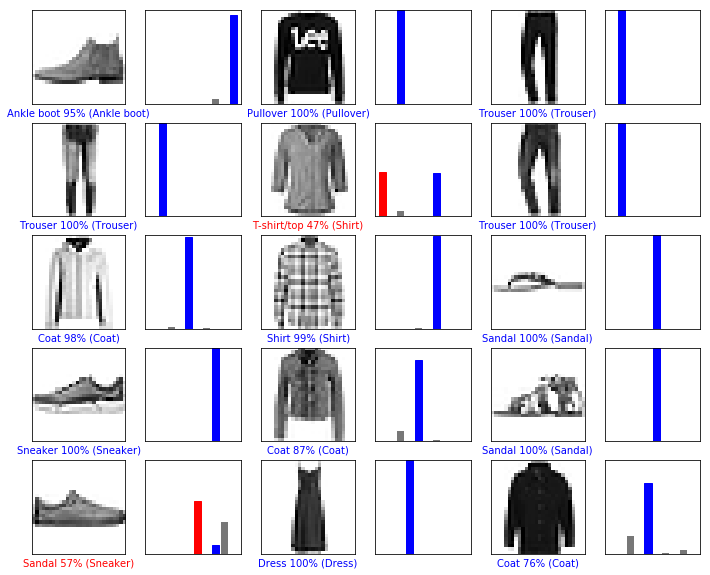

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [45]:
img = test_images[0]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.8444273e-07 8.4755536e-09 4.5563806e-06 1.0259984e-07 2.5201919e-06
  3.6201910e-03 8.8371092e-07 4.8890676e-02 2.2947845e-05 9.4745719e-01]]


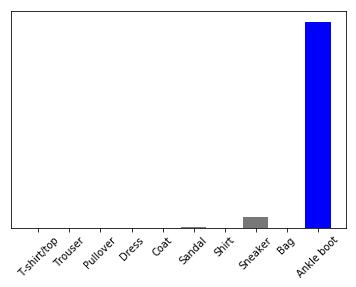

In [48]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [49]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
